## Prepare a classification model using Naive Bayes for salary data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
salary_train = pd.read_csv('SalaryData_Train.csv')

In [3]:
salary_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [5]:
for i in salary_train.columns:
    if salary_train[i].dtype == object:
        print(salary_train[i].value_counts())

workclass
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: count, dtype: int64
education
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: count, dtype: int64
maritalstatus
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: count, dtype: int64
occupation
 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sal

<Axes: xlabel='Salary', ylabel='age'>

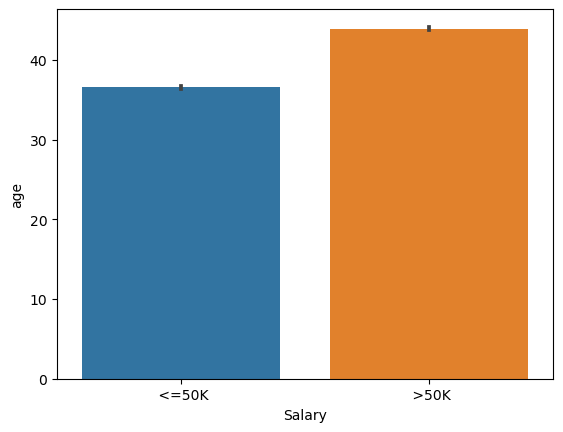

In [6]:
sns.barplot(x='Salary',y='age',data=salary_train)

In [7]:
X = salary_train.drop(columns='Salary')
y = salary_train['Salary']

In [8]:
X = pd.get_dummies(X, drop_first=True).astype(int)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,test_size=0.3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21112, 94)
(9049, 94)
(21112,)
(9049,)


In [10]:
clf = GaussianNB()
clf.fit(X_train,y_train)

GaussianNB()

In [11]:
y_pred = clf.predict(X_test)

In [12]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8227428445132059
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.91      0.85      0.88      6796
        >50K       0.62      0.73      0.67      2253

    accuracy                           0.82      9049
   macro avg       0.76      0.79      0.78      9049
weighted avg       0.84      0.82      0.83      9049

Confusion Matrix:
 [[5793 1003]
 [ 601 1652]]


In [13]:
y_train_pred = clf.predict(X_train)

In [14]:
print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_pred))

0.8227074649488443
0.8227428445132059


Let's try to use K-Fold validation for the data and check the accuracy

In [15]:
kf = KFold(n_splits=4, shuffle=True)

scores = cross_val_score(clf, X, y, cv=kf)

predicted_labels = cross_val_predict(clf, X, y, cv=kf)

report = classification_report(y, predicted_labels)

print(report)

              precision    recall  f1-score   support

       <=50K       0.90      0.85      0.88     22653
        >50K       0.62      0.72      0.67      7508

    accuracy                           0.82     30161
   macro avg       0.76      0.79      0.77     30161
weighted avg       0.83      0.82      0.83     30161



In [16]:
skf = StratifiedKFold(n_splits=4, shuffle=True)

predicted_labels = cross_val_predict(clf, X, y, cv=skf)

report = classification_report(y, predicted_labels)

print(report)

              precision    recall  f1-score   support

       <=50K       0.90      0.85      0.88     22653
        >50K       0.62      0.72      0.67      7508

    accuracy                           0.82     30161
   macro avg       0.76      0.79      0.77     30161
weighted avg       0.83      0.82      0.83     30161



Hyper-parameter Tuning

In [17]:
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

best_var_smoothing = grid_search.best_params_['var_smoothing']

best_model = GaussianNB(var_smoothing=best_var_smoothing)

In [18]:
best_model.fit(X,y)

GaussianNB()

In [19]:
skf = StratifiedKFold(n_splits=5, shuffle=True)

predicted_labels = cross_val_predict(best_model, X, y, cv=skf)

report = classification_report(y, predicted_labels)

print(report)

              precision    recall  f1-score   support

       <=50K       0.90      0.85      0.88     22653
        >50K       0.62      0.72      0.67      7508

    accuracy                           0.82     30161
   macro avg       0.76      0.79      0.77     30161
weighted avg       0.83      0.82      0.83     30161



In [20]:
kf = KFold(n_splits=4, shuffle=True)

scores = cross_val_score(best_model, X, y, cv=kf, scoring='accuracy')

predicted_labels = cross_val_predict(best_model, X, y, cv=kf)

report = classification_report(y, predicted_labels)

print(report)

              precision    recall  f1-score   support

       <=50K       0.90      0.86      0.88     22653
        >50K       0.62      0.72      0.67      7508

    accuracy                           0.82     30161
   macro avg       0.76      0.79      0.77     30161
weighted avg       0.83      0.82      0.83     30161



In [21]:
y_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

print(accuracy_score(y_train, y_train_pred))
print(accuracy_score(y_test, y_pred))

0.8219022356953392
0.8228533539617637


In [22]:
salary_test = pd.read_csv('SalaryData_Test.csv')

In [23]:
X = salary_test.drop(columns='Salary')
y = salary_test['Salary']

In [24]:
X = pd.get_dummies(X, drop_first=True).astype(int)

In [25]:
salary_test['Sal_pred']=clf.predict(X)

In [26]:
salary_test.head(20)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary,Sal_pred
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,<=50K
5,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K,>50K
6,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K,<=50K
7,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K,<=50K
8,65,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K,>50K
9,36,Federal-gov,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K,>50K
